In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import netCDF4 as nc4

In [66]:
pmm = "netcdf_files/eORCA1.4.2_ModifStraits_domain_cfg.nc"

mm = nc4.Dataset(pmm)
gbathy = mm.variables['bathy_meter'][0]
glamt = mm.variables['glamt'][0] ; gphit = mm.variables['gphit'][0]
#tmask = mm.variables['top_level'][0]
#mm.close()

nJ,nI = np.shape(gbathy)

blevels = [-6000, -5500, -5000, -4500, -4000, -3000, -2000, 0.]

from matplotlib.colors import LinearSegmentedColormap 
cmap2 = LinearSegmentedColormap.from_list(name="custom_map", 
                                          colors =['DarkBlue', 
                                                   'CornflowerBlue', 
                                                   'white'],
                                          N=len(blevels))
import numpy.ma as ma
gbathy = ma.masked_values(gbathy, 0.)
#gbathy = np.where(gbathy<=0., -1., gbathy)


saving : bathy.png


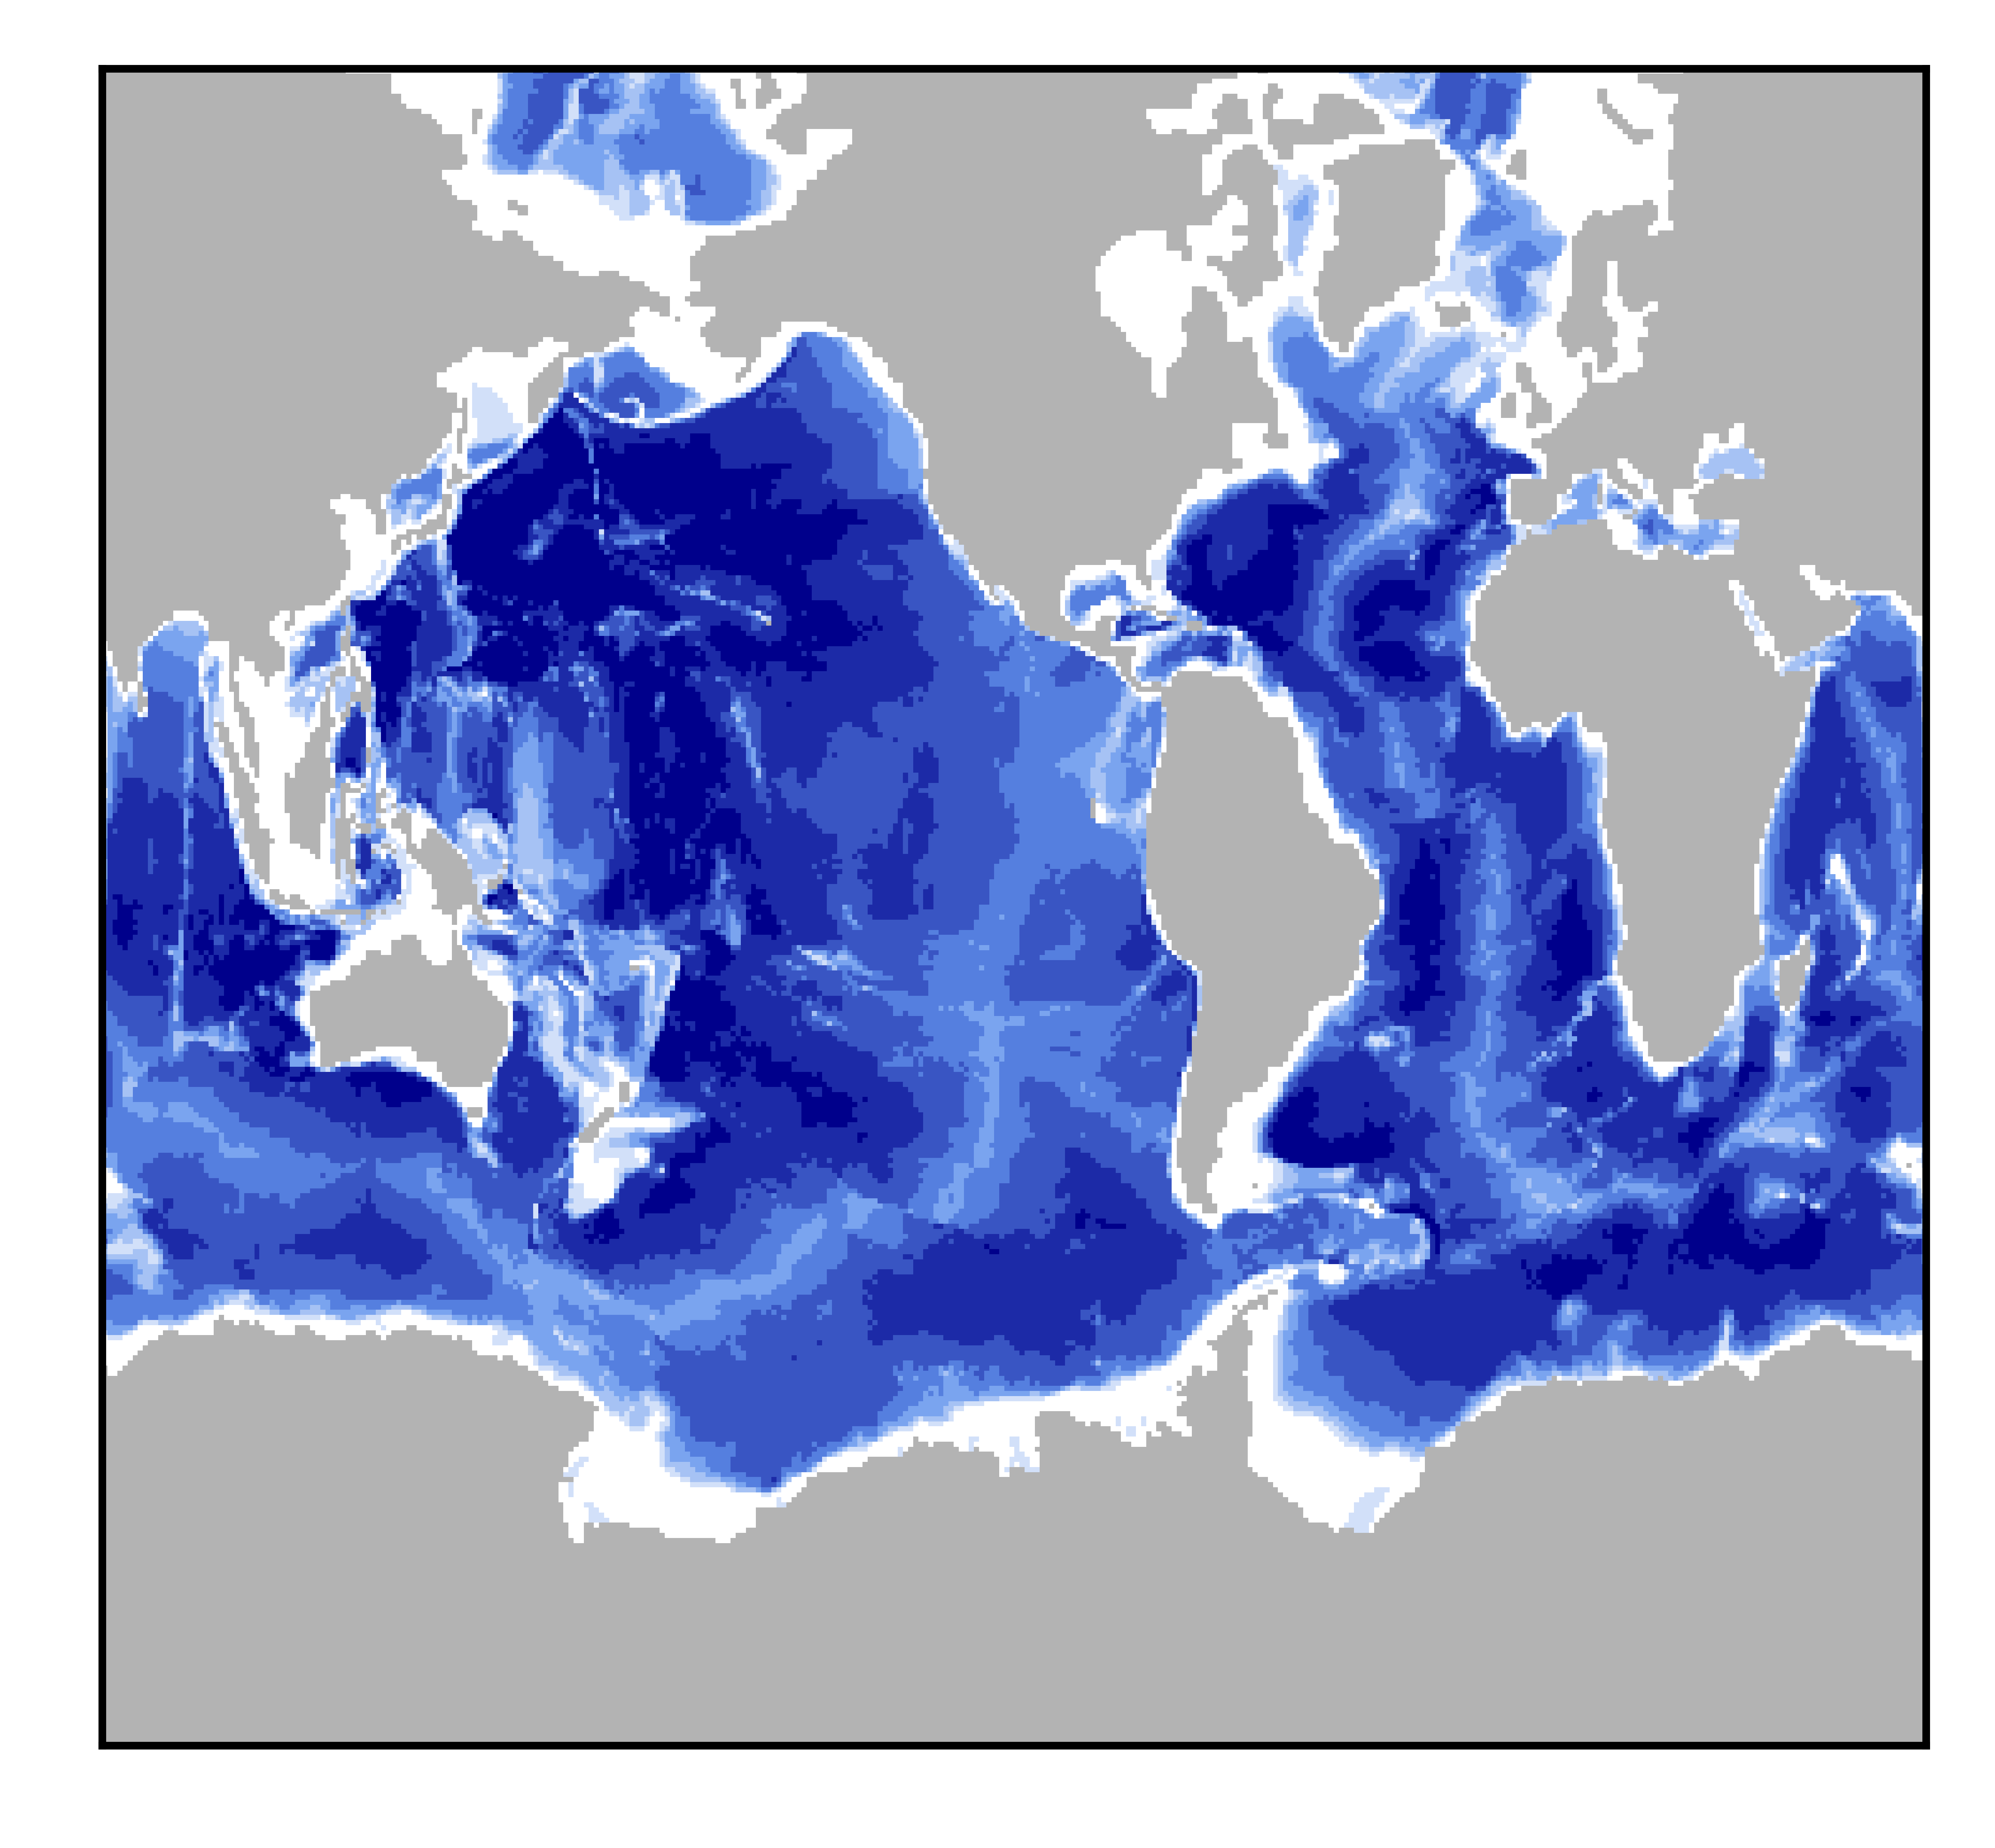

In [68]:
dpi = 1600
psave = "bathy.png"

fig, ax = plt.subplots(1,1, figsize=(3,3), dpi = dpi)
zer = ax.imshow(-gbathy[::-1], cmap = cmap2)
ax.patch.set_color('0.7')
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
#fig.colorbar(zer,  ticks=blevels,
#             shrink=0.8, location='right',
#             aspect = 30, fraction=0.05, pad = 0.02)
plt.savefig(psave,dpi=dpi)
print("\nsaving : %s" % psave)
plt.show()

In [4]:
e3t0 = mm.variables['e3t_0'][0]
e3t_1d = mm.variables['e3t_1d'][0]
botl = mm.variables['bottom_level'][0] # goes from 0 to 74 (75 levels)
nK,_,_ = np.shape(e3t0)

#tmp = np.zeros((nJ,nI))
#for i in range(nI):
#    for j in range(nJ):
#        tmp[j,i] = np.sum(e3t0[:botl[j,i],j,i])
### np.sum(tmp-gbathy) = 3.0468072509393096e-11
        
pdept_1d = np.cumsum(e3t_1d,axis=0)

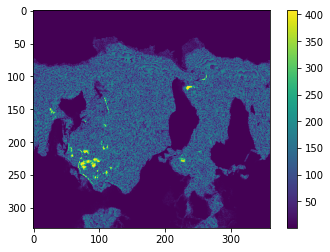

In [5]:
last_e3t0 = np.zeros((nJ,nI))
for i in range(nI):
    for j in range(nJ):
        last_e3t0[j,i] = e3t0[botl[j,i],j,i]
         
plt.imshow(last_e3t0)
plt.colorbar()

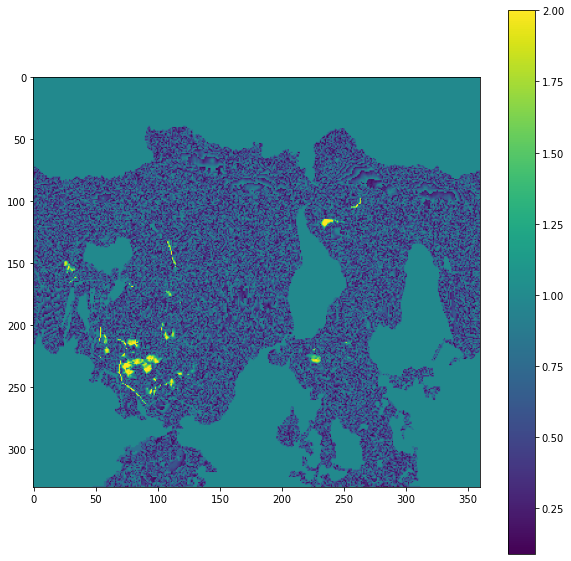

In [6]:
tmp = np.zeros((nJ,nI))
for i in range(nI):
    for j in range(nJ):
        tmp[j,i] = e3t0[botl[j,i],j,i] / e3t_1d[botl[j,i]]
        
plt.figure(figsize=(10,10))
plt.imshow(tmp)
plt.colorbar()


In [ ]:

pmm = "netcdf_files/eORCA1.4.2_ModifStraits_domain_cfg.nc"
mm = nc4.Dataset(pmm)

e3w_0 = mm.variables['e3w_0'][0] ; e3uw_0 = mm.variables['e3uw_0'][0] ; e3vw_0 = mm.variables['e3vw_0'][0]
e3w_1d = mm.variables['e3w_1d'][0]

tmp = np.copy(e3w_0)
for i in range(nI):
    for j in range(nJ):
        tmp[:,j,i] = e3w_0[:,j,i]/e3w_1d[:] - 1.
        
plt.figure(figsize=(10,10))
plt.imshow(tmp)
plt.colorbar()


In [124]:
streched = np.where(tmp>1.)
for _ in range(len(streched[0][:])):
    print(botl[streched[0][_],streched[1][_]])

74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
73
74
74
73
73
74
73
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
73
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
73
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
7

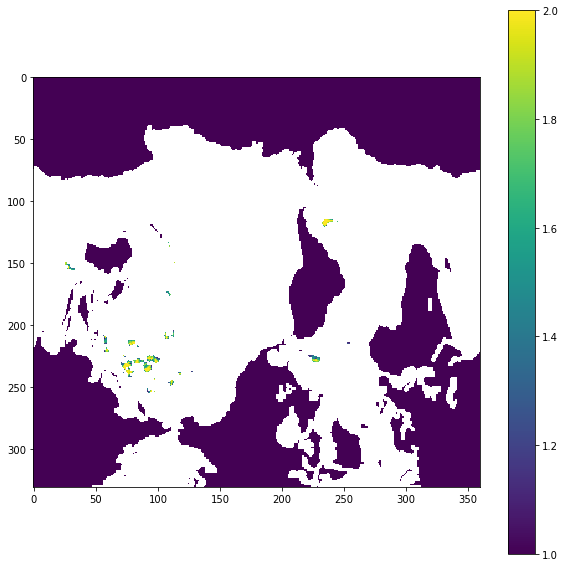

In [107]:
tmp_m1 = np.ma.masked_less(tmp,1)
plt.figure(figsize=(10,10))
plt.imshow(tmp_m1)
plt.colorbar()

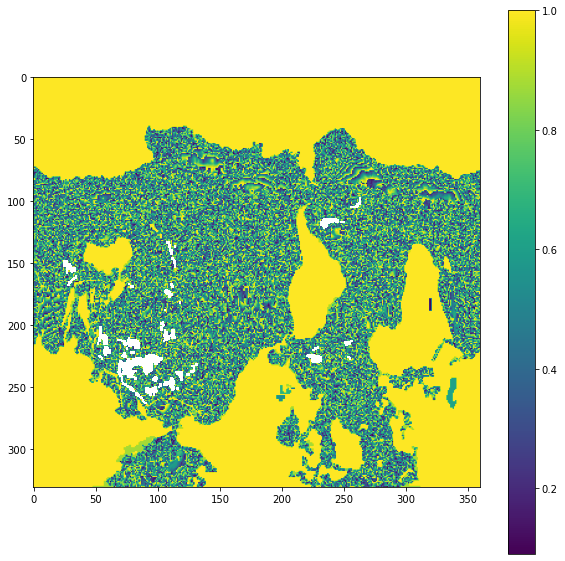

In [108]:
tmp_p1 = np.ma.masked_greater(tmp,1)
plt.figure(figsize=(10,10))
plt.imshow(tmp_p1)
plt.colorbar()

---

In [67]:
""" 
taken from NEMO 4.2/src/OCE/USR/usrdef_zgr.F90
zgr_z
Madec & Imbard 1996 function with the following coefficients : 
determined from the constraint in IM96, works well for nK=31
"""
zsur = -2033.194295283385  
za0  =   155.8325369664153 
za1  =   146.3615918601890
zkth =    17.28520372419791
zacr =     5.0       

nK = 31

pdepw_1d = np.zeros((nK)) ; pdept_1d = np.zeros((nK))
for k in range(nK) :
    zw = np.float64(k+1)
    zt = np.float64(k+1) + 0.5
    pdepw_1d[k] = zsur + za0*zw + za1*zacr*np.log( np.cosh( (zw-zkth) / zacr ) )  
    pdept_1d[k] = zsur + za0*zt + za1*zacr*np.log( np.cosh( (zt-zkth) / zacr ) )  

In [ ]:
""" 
called in zgr_z
taken from NEMO 4.2/src/OCE/DOM/depth_e3.F90
depth_to_e3_1d
"""  
pe3w_1d = np.zeros((nK)) ; pe3t_1d = np.zeros((nK))

pe3w_1d[0] = 2. * ( pdept_1d[0] - pdepw_1d[0] ) 
for k in range(nK-1) :
    pe3w_1d[k+1] = pdept_1d[k+1] - pdept_1d[k] 
    pe3t_1d[k  ] = pdepw_1d[k+1] - pdepw_1d[k] 

pe3t_1d[-1] = 2. * ( pdept_1d[-1] - pdepw_1d[-1] )

(5000.0, 0.0)

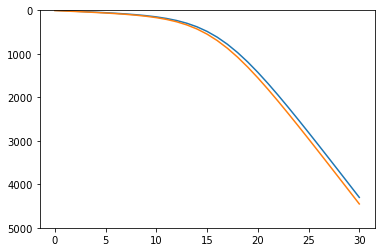

In [68]:
""" 
called in zgr_z
taken from NEMO 4.2/src/OCE/DOM/depth_e3.F90
e3_to_depth_1d
""" 
pdepw_1d[0] = 0.0
pdept_1d[0] = 0.5 * pe3w_1d[0]
for k in range(1,nK) :
    pdepw_1d[k] = pdepw_1d[k-1] + pe3t_1d[k-1] 
    pdept_1d[k] = pdept_1d[k-1] + pe3w_1d[k  ] 

plt.plot(pdepw_1d)
plt.plot(pdept_1d)
plt.ylim(5000,0)

In [66]:
pdepw_1dpdepw_1d

array([   0.        ,   10.0035148 ,   20.26824085,   30.92176994,
         42.15337865,   54.2430769 ,   67.603407  ,   82.83848063,
        100.82498063,  122.81826267,  150.58089702,  186.51725072,
        233.77214094,  296.21536903,  378.20454174,  484.03994033,
        617.14871034,  779.24414316,  969.84377441, 1186.40918537,
       1425.02843235, 1681.28932276, 1950.99609205, 2230.5768723 ,
       2517.21195506, 2808.7882252 , 3103.77775842, 3401.10248727,
       3700.01432631, 4000.        , 4300.71001722])

In [39]:
zw=2.
zsur + za0*zw + za1*zacr*np.log( np.cosh( (zw-zkth) / zacr ) ) 

10.003514801812571

In [40]:
zsur

-2033.194295283385

In [41]:
za0*zw

311.6650739328306

In [42]:
za1*zacr

731.8079593009451

In [43]:
(zw-zkth) / zacr

-3.0570407448395818

In [44]:
np.log( np.cosh( (zw-zkth) / zacr ) ) 

2.366102628627328

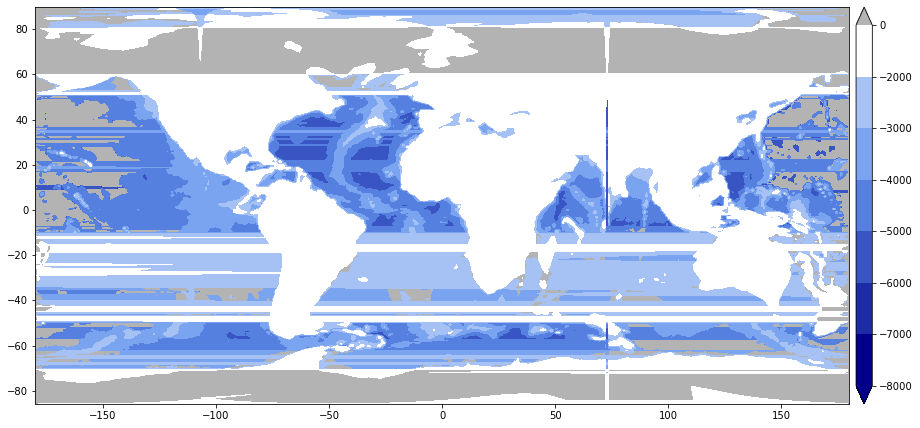

In [10]:
%matplotlib inline

import cartopy.crs as ccrs

from matplotlib.colors import BoundaryNorm
bnorm = BoundaryNorm(blevels, ncolors=len(blevels), clip=False)

fig, ax = plt.subplots(figsize=(15,15))
pc = ax.contourf(glamt,gphit,-gbathy, corner_mask = False,
                    levels = blevels, extend='both', norm=bnorm,
                    cmap=cmap2)
#ax.contour(glamt,gphit,depfloor, levels=blevels[::2], negative_linestyles = 'solid', colors='k', linewidths = 1.)
ax.set_aspect(aspect='equal')
ax.patch.set_color('0.7')

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='2%', pad=0.1)
fig.colorbar(pc, ticks=blevels, spacing='uniform', cax=cax)
    
#ax.set_adjustable("box")
plt.show()

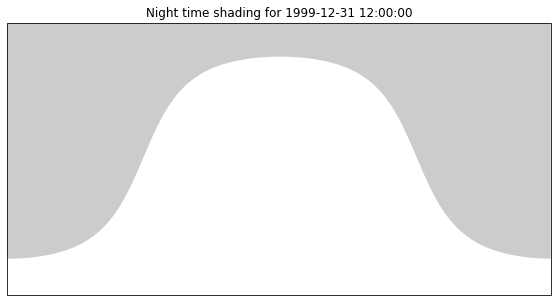

In [4]:
import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature.nightshade import Nightshade


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

date = datetime.datetime(1999, 12, 31, 12)

ax.set_title(f'Night time shading for {date}')
#ax.stock_img()
ax.add_feature(Nightshade(date, alpha=0.2))
plt.show()
